In [263]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.io import loadmat
from PIL import Image
%matplotlib inline
%matplotlib widget
from sklearn.model_selection import train_test_split

In [280]:
# Load data
data = loadmat("mnist-digit.mat")
#print(data_k)
data_k = list(data.keys())
#display(x_data)
y_data = data['y']
x_data = data['X']

#print(x_data.shape)
# w = np.arange(400)
# print(np.dot(x_data,w).shape)
# print(np.matmul(x_data,w).shape)
#print(np.dot(x_data,w) == np.matmul(x_data,w))
# if y.dtype == bool:
#         y = y.astype(int)
#print(y_data)
y_data = y_data.astype(int)
y_data[y_data == 10] = 0
print(y_data)
#print(np.transpose(x_data).shape)



[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]
[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


In [281]:

# display(y_data.shape)
# display(x_data.shape)
# print(y_data.dtype==bool)
print(y_data)

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


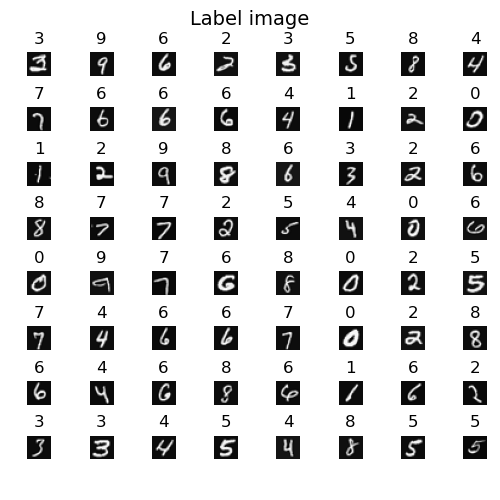

In [282]:
# Randomly select data points to display
m,n = x_data.shape
fig,axis = plt.subplots(8,8,figsize=(5,5))

fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
#widgvis(fig)
for i,ax in enumerate(axis.flat):
    
    pick_rand = np.random.randint(m)
    x_train_modi = x_data[pick_rand].reshape(20,20).T
    ax.imshow(x_train_modi, cmap="gray")
    ax.set_title(y_data[pick_rand,0])
    ax.set_axis_off()
    fig.suptitle("Label image",fontsize=14)


</h> Using the sk-learn library to just split the data set into train and testing data set.

In [283]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.30,random_state = 1,shuffle=True)
#display(y_train[100:200,:])

In [284]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [285]:
def lrcostfunction(w,x,y):
    m,n = x.shape
    z = np.matmul(x,w)
    h_w_b = sigmoid(z) 
    total_cost = np.matmul(-y.reshape(1,m),np.log(h_w_b)) - np.matmul((1-y).reshape(1,m),np.log(1-h_w_b))
    total_cost = total_cost/m
    grad = np.matmul(np.transpose(x),(h_w_b.reshape(len(h_w_b),1)-y))
    return total_cost[0] , grad.reshape(-1,)
    

In [306]:
def onevsall(x,y,num_labels):
    m,n = x.shape
    # Weights initialization
    np.random.seed(1)
    all_w = np.random.normal(size=(num_labels,n+1)) # (random number with normal distribution)
#     all_w = np.random.rand(num_labels,n+1)
    print(all_w)
    # w0 = np.ones((len(unique_labels),X.shape[1]))
    # w0 = np.random.rand(len(unique_labels),X.shape[1])
    #all_w = np.zeros((num_labels,n+1))
    x = np.concatenate([np.ones((m,1)),x],axis=1)
    for c in np.arange(num_labels):
        y_train_new = np.array([1 if y == (num_labels) else 0 for y in y_train])
        y_train_new = y_train_new.reshape(-1,1)
        res = optimize.minimize(lrcostfunction,all_w[c,:],(x, y_train_new),jac = True,method = 'CG',options = {'maxiter' : 1000,'disp': True})
        all_w[c,:] = res.x
    return all_w
        

In [307]:
w_final = onevsall(x_train,y_train,10)

[[ 1.62434536 -0.61175641 -0.52817175 ... -0.03536792  2.11060505
  -1.30653407]
 [ 0.07638048  0.36723181  1.23289919 ... -0.32420422  0.81434313
   0.78046993]
 [-1.46405357 -0.15449119 -0.09243232 ... -0.53903258  0.64409999
   0.18363357]
 ...
 [-1.15637559  0.67452822 -0.59064538 ... -0.06373105 -0.18964366
   0.86167039]
 [ 1.78918543 -0.18801525  0.00858861 ...  2.14640218  2.13640549
   0.97422963]
 [-0.18978997 -0.66284785  0.41396654 ...  1.4902898  -0.32107715
   0.56080603]]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 70
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 82
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 74
         Gradient evaluati

In [308]:
print(w_final)
print(w_final.shape)

[[-1.75551748 -0.61175641 -0.52817175 ... -0.03537685  2.11060562
  -1.30653407]
 [-3.19278113  0.36723181  1.23289919 ... -0.32420957  0.81434357
   0.78046993]
 [-4.33961814 -0.15449119 -0.09243232 ... -0.5390372   0.64410055
   0.18363357]
 ...
 [-4.10181215  0.67452822 -0.59064538 ... -0.06373506 -0.18964305
   0.86167039]
 [-1.52785763 -0.18801525  0.00858861 ...  2.14640211  2.13640549
   0.97422963]
 [-3.26127966 -0.66284785  0.41396654 ...  1.49028636 -0.32107677
   0.56080603]]
(10, 401)


In [309]:
x_test_1 = np.concatenate([np.ones((1500,1)),x_test],axis=1)
z_1= np.matmul(x_test_1,np.transpose(w_final)) 
print(x_test_1.shape)
h_w_b_1 = sigmoid(z_1)
print(h_w_b_1)
#h_w_b_1 = np.round(h_w_b_1)
#h = np.where(h_w_b_1 > 0.5 , 1, 0)
print(np.argmax(h_w_b_1[8,:]))

#p1 = np.sum(h==y_test)/len(y_test)
#print(p1)

#print(w_final[0,:].shape)
#print(x_test_1.shape)

(1500, 401)
[[5.54700452e-11 4.19007544e-11 3.17298768e-14 ... 6.83453370e-13
  4.91342009e-14 2.96278360e-13]
 [7.96458581e-21 1.96811099e-19 1.53631623e-18 ... 8.45950715e-20
  1.12835386e-19 2.67799182e-20]
 [1.01566090e-18 3.95603437e-19 1.42823569e-17 ... 1.26754995e-16
  1.09685648e-19 3.17511775e-18]
 ...
 [7.41569111e-13 1.98571176e-12 5.28730854e-11 ... 5.64380623e-13
  6.51496626e-12 7.32497100e-11]
 [6.21921371e-18 2.59455531e-17 7.05772371e-15 ... 3.49760984e-14
  4.40352348e-19 5.44839225e-16]
 [4.73857335e-24 4.83754417e-24 1.40888892e-18 ... 2.60568497e-19
  1.60563195e-23 5.25750805e-22]]
4


In [310]:
print(h_w_b_1.shape)

(1500, 10)


In [311]:
def predictOneVsAll(all_w, x):
        
    m,n = x.shape 
    x = np.concatenate([np.ones((m,1)),x],axis=1)
    z_1= np.matmul(all_w,np.transpose(x))
    h_w_b_1 = sigmoid(z_1)
    # Return the following variable 
    p = np.zeros(m)
    for i in range(m):
        p[i] = np.argmax(h_w_b_1[:,i])
    
    return p

In [312]:
predicted_y_test = predictOneVsAll(w_final,x_train)
print(predicted_y_test.shape)

(3500,)


In [313]:
t = y_train.reshape(-1,)
print( "Accuracy : " , sum(predicted_y_test == t)/len(t)*1000, "%" )

Accuracy :  84.28571428571428 %
